# Nonuniform sensitivity

## Background

Not all pixels in a camera have the same sensitivity to light: there are
intrinsic differences from pixel-to-pixel. Vignetting, a dimming near the
corners of an image caused by the optical system to which the camera is
attached, and dust on optical elements such as filters, the glass window
covering the CCD, and the CCD chip itself can also block some light.

Vignetting and dust can reduce the amount of light reaching the CCD chip while
pixel-to-pixel sensitivity variations affects the counts read from the chip.

The code to produce the simulated sensitivity map (aka flat image) is long
enough that is not included in this notebook. We load it instead from
[image_sim.py](image_sim.py).

## Вступ

Кожен піксель у камері має трохи різну реакцію на світло. Віньєтування -- затемнення біля країв зобаження
утворюються як результат оптичного обладнання до якого приєднана камера. Пил та такі оптичні елементи як фільтри, лінза камери, та сам ПЗЗ чип поглинають частину світла.

Віньєтування та пил можуть зменшити кількість світла що досягає ПЗЗ, в той час як різна реакція пікселів на світло створює нерівномірність у зображені.

Код для створення симулюваної кадра чутливості надто довгий для цього посібника. Натомість ми використаємо
[image_sim.py](image_sim.py).

In [1]:
import numpy as np

from convenience_functions import show_image
import image_sim as isim

## A sample flat image

The sample flat image below has the same size as the simulated image in the
previous notebook.

## Приклад кадру чутливості

Цей кадр чутливості має такий самий розмір як і зображення у попередньому блокноті.

In [2]:
image = np.zeros([2000, 2000])
flat = isim.sensitivity_variations(image)

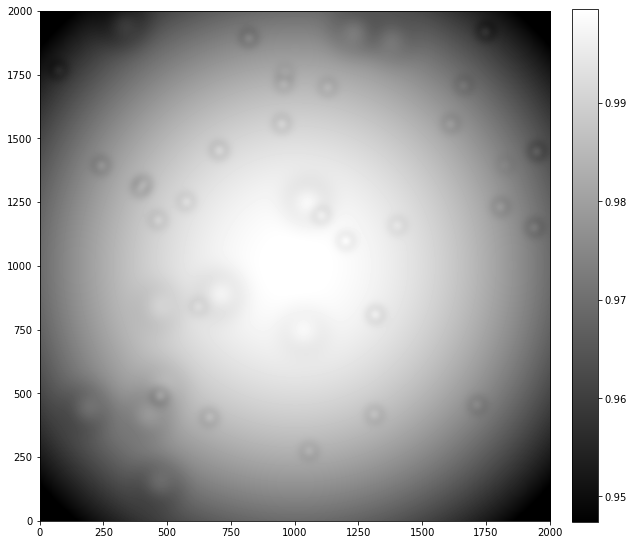

In [3]:
show_image(flat, cmap='gray')

The "donuts" in the image are dust on elements like filters in the optical path.
Note that the size of the variations is small, a few percent at most.

"Бублики" у зображені це пилинки на фільтрі чи у оптичному шляху. Варто помітити що  зміна яскравості
у затемнених частинах невелика, усього декілька відсотків.

## Effect of nonuniform sensitivity on images

Recall that an image read off a CCD, ignoring variations in sensitivity, can be
thought of as a combination of several pieces:

$$
\text{image} = \text{bias} + \text{noise} + \text{dark current} + \text{sky} + \text{stars}
$$

The effect of sensitivity variations is to reduce the amount of *light* reaching
the sensor. In the equation above, that means that the flat multiplies just the
sky and stars portion of the input:

$$
\text{image} = \text{bias} + \text{noise} + \text{dark current} + \text{flat} \times (\text{sky} + \text{stars})
$$


## Вплив нерівномірної чутливості на зображення

Згадаймо що зображення зчитане з ПЗЗ, не враховуючи нерівномірну чутливість, можна описати 
декількома частинами:

$$
\text{зображення} = \text{напруга зсуву} + \text{шум} + \text{темновий струм} + \text{небо} + \text{зорі}
$$

Нерівномірна чутливість впливає на кількість *світла* яка досягає сенсору. Отже, кадр чутливості показує 
вплив лише на "небо" та "зорі" у зображені:

$$
\text{зображення} = \text{напруга зсуву} + \text{шум} + \text{темновий струм} + \text{кадр чутливості} \times (\text{небо} + \text{зорі})
$$


## A realistic image

In the cell below we construct the last image from the previous notebook. Recall
that there we used a read noise of 5 electrons/pixel, dark current of 0.1
electron/pix/sec, bias level of 1100, and sky background of 20 counts.

## Реалістичне зображення

У клітинці нижче ми сконсруюємо остання зображення з попереднього блокноту. Згадаймо що ми використовували
шум зчитування 5 електронів/піксель, темновий струм 0.1 електрон/піксель/секунда, напругу зсуву 1100, і
небо у 20 зчитувань.

In [4]:
gain = 1.0
exposure = 30.0
dark = 0.1
sky_counts = 20
bias_level = 1100
read_noise_electrons = 5
max_star_counts = 2000
bias_only = isim.bias(image, bias_level, realistic=True)
noise_only = isim.read_noise(image, read_noise_electrons, gain=gain)
dark_only = isim.dark_current(image, dark, exposure, gain=gain, hot_pixels=True)
sky_only = isim.sky_background(image, sky_counts, gain=gain)
stars_only = isim.stars(image, 50, max_counts=max_star_counts)

The individual pieces of the image are assembled below; it is the inclusion of
the flat that makes this the closest of the simulated images to a realistic
images.

Кожна частинка зображення складена разом у клітинці нижче. Врахування кадру чутливості 
створює зображення найбільш наближине до реалістичного зображення.

In [5]:
final_image = bias_only + noise_only + dark_only + flat * (sky_only + stars_only)

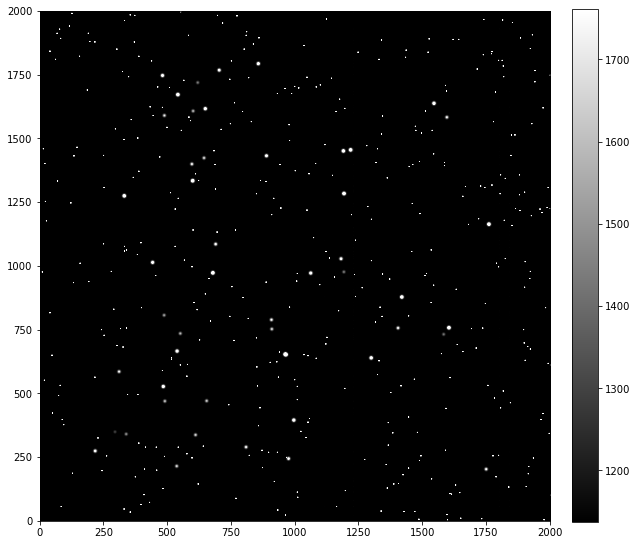

In [6]:
show_image(final_image, cmap='gray', percu=99.9)

Visually, this does not look any different than the final image in the previous
notebook; the effects of sensitivity variations are typically not evident in raw
images unless the sky background is large.

You can see the effect by artificially increasing the sky background.

Візуально, воно майже не відрізняється від зображення з попереднього блокноту. Вплив нерівномірної чутливості
зазвичай не помітний у необроблених зображеннях. Цей ефект може бути помітний якщо кількість світла від неба 
дуже висока. 

У зображені нижче ми штучно підвищили яскравість неба.

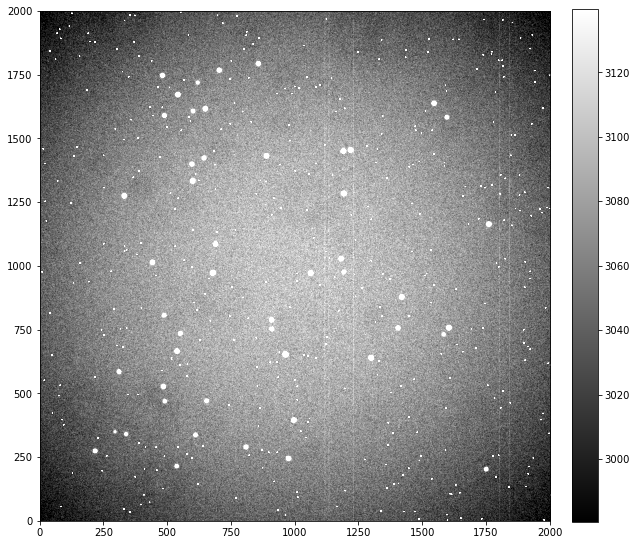

In [7]:
final_image2 = bias_only + noise_only + dark_only + flat * (isim.sky_background(image, 100 * sky_counts, gain=gain) + stars_only)
show_image(final_image2, cmap='gray')